<a href="https://colab.research.google.com/github/Patrick-Munyao/Financial_Inclusion_Descriptive-Stat/blob/main/Financial_Inclusion_Descriptive_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Financial Inclusion - Descriptive Analysis**

## Expectations:

1. Define the question, the metric for success, the context, experimental design taken and the appropriateness of the available data to answer the given question
2. Find and deal with outliers, anomalies, and missing data within the dataset
3. Perform univariate, bivariate and multivariate analysis recording your observations.
4. Implement the solution by performing the respective analysis i.e. factor analysis, principal component analysis, and discriminant analysis.
5. Challenge your solution by providing insights on how you can make improvements.

# Importing relevant Libraries

In [239]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

# Loading and reviewing the data under study

In [240]:
# dataset url = https://bit.ly/FinancialDataset
data = pd.read_csv("https://bit.ly/FinancialDataset")

# Previewing the top 5 records of the data
data.head()


,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [241]:
# Previewing the bottom 5 records of the data
data.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [242]:
# Verying data size by rows and columns
data.shape

(23524, 13)

> Data has 23524 rows and 13 columns

In [243]:
# Verifying data types for each column
data.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object



> While all the other columns contain strings, the 'year' column is composed of integers, and both household_size & respondent age have float data types.

 

In [244]:
# Getting information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB




> There are null values in all columns except for 'year' and 'uniqueid' columns. These missing values will be droped since they are presumed too few to skew our study findings



In [245]:
# Checking for the sum of missing values for each column
data.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [246]:
# Check for duplicates in the dataset
data.duplicated()
data.duplicated().sum()

0



> The data has no duplicates 



In [247]:
data.nunique()

country                      4
year                         6
uniqueid                  8735
Has a Bank account           2
Type of Location             2
Cell Phone Access            2
household_size              21
Respondent Age              85
gender_of_respondent         2
The relathip with head       6
marital_status               5
Level of Educuation          7
Type of Job                 10
dtype: int64

In [248]:
data.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


AxesSubplot(0.125,0.125;0.775x0.755)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


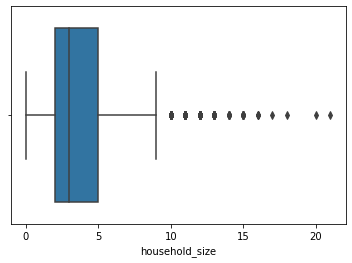

In [249]:
# Checking if outliers exist in the data
print(sns.boxplot(data['household_size']))




> There are outliers in the data and we shall clean them later on



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


AxesSubplot(0.125,0.125;0.775x0.755)


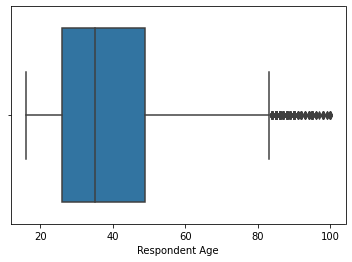

In [250]:
print(sns.boxplot(data['Respondent Age']))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


AxesSubplot(0.125,0.125;0.775x0.755)


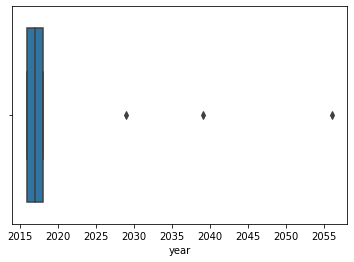

In [251]:
print(sns.boxplot(data['year']))



> Outliers detected. To be cleaned. 



In [252]:
# checking for anormalities

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

IQR = Q3 - Q1
IQR

year               2.0
household_size     3.0
Respondent Age    23.0
dtype: float64

# Data Cleaning

In [253]:
# Dropping null values
data_clean = data.dropna()
data_clean


,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [254]:
# Preview resulting data for any missing values
data_clean.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [255]:
# Renaming the columns to remove inconsistencies 
data_renamed_columns = data_clean.rename(columns = {'Has a Bank account':'bank_account', 'Type of Location': 'location_setting', 'Cell Phone Access': 'cell_phone_access', 'Respondent Age': 'respodent_age', 'The relathip with head': 'relationship_with_head', 'Level of Educuation':'education_level','Type of Job':'job_type'}, inplace=True)
data_clean.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,country,year,uniqueid,bank_account,location_setting,cell_phone_access,household_size,respodent_age,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [256]:
# Removing Outliers identified above
df_cleaned =data_clean[~((data_clean < (Q1 - 1.5 * IQR)) |(data_clean > (Q3 + 1.5 * IQR))).any(axis=1)]
df_cleaned.head()

,country,year,uniqueid,bank_account,location_setting,cell_phone_access,household_size,respodent_age,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [257]:
# Drop Unnecessary column
df_cleaned1 = df_cleaned.drop(['uniqueid'],axis=1)
df_cleaned1.shape

(22964, 12)

# Exploratory Data Analysis

In [258]:
# Reviewing the target distribution by cumulative count
df_cleaned1['bank_account'].value_counts()

No     19713
Yes     3251
Name: bank_account, dtype: int64

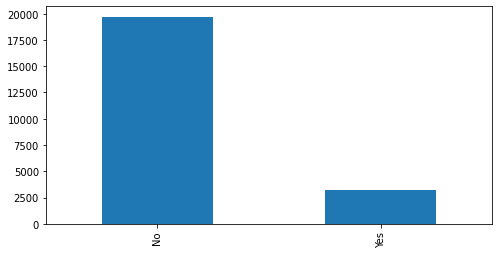

In [259]:
# Visualizing the target distribution
df_cleaned1.bank_account.value_counts().plot(kind='bar', figsize=(8,4))

In [260]:
# Reviewing the target distribution by country
pd.crosstab(df_cleaned1['country'],df_cleaned1['bank_account'])

bank_account,No,Yes
country,,
Kenya,4447,1504
Rwanda,7608,982
Tanzania,5893,599
Uganda,1765,166


In [261]:
from sklearn.preprocessing import LabelEncoder
ba = LabelEncoder()
df_cleaned1['bank_account'] = ba.fit_transform(df_cleaned1['bank_account'])
df_cleaned1.head()

,country,year,bank_account,location_setting,cell_phone_access,household_size,respodent_age,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,1,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,0,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,1,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,0,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,0,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


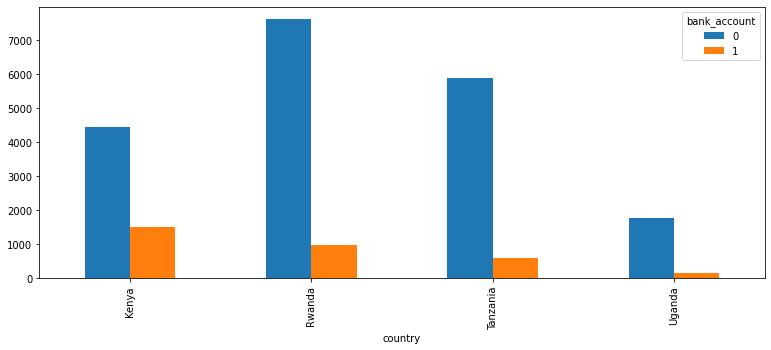

In [262]:
pd.crosstab(df_cleaned1['country'], df_cleaned1['bank_account']).plot(kind='bar', figsize = (13,5))

# Univariate Analysis

### Measures of Central Tendency





In [263]:
# Finding the mean of the numerical variables
df_cleaned1[{'household_size','respodent_age'}].mean()


respodent_age     38.871538
household_size     3.566757
dtype: float64

In [264]:
# Finding the median of the numerical variables
df_cleaned1[{'household_size','respodent_age'}].median()

respodent_age     35.0
household_size     3.0
dtype: float64

In [265]:
# Finding the mode of the numerical variables
df_cleaned1[{'household_size','respodent_age'}].mode()

,respodent_age,household_size
0,30.0,2.0


### Measures of Dispersion

In [266]:
## Finding the variance of the numerical variables
df_cleaned1[{'household_size','respodent_age'}].var()

respodent_age     273.476943
household_size      4.326032
dtype: float64

In [267]:
## Finding the standard variation of the numerical variables
df_cleaned1[{'household_size','respodent_age'}].std()

respodent_age     16.537138
household_size     2.079911
dtype: float64

In [268]:
# Quantiles of household sizes and respodents' age
df_cleaned1[{'household_size','respodent_age'}].quantile([0.25,0.5,0.75])


,respodent_age,household_size
0.25,26.0,2.0
0.50,35.0,3.0
0.75,49.0,5.0


In [269]:
# Skewness of household sizes and respodents' age
df_cleaned1[{'household_size','respodent_age'}].skew()

respodent_age     0.843711
household_size    0.611275
dtype: float64

In [270]:
# Kurtosis of household sizes and respodents' age
df_cleaned1[{'household_size','respodent_age'}].kurt()

respodent_age     0.098437
household_size   -0.496632
dtype: float64

In [271]:
# Farther descrptive statistics for household sizes and respodents' age
df_cleaned1[{'household_size','respodent_age'}].describe()

,respodent_age,household_size
count,22964.000000,22964.000000
mean,38.871538,3.566757
std,16.537138,2.079911
min,16.000000,0.000000
25%,26.000000,2.000000
50%,35.000000,3.000000
75%,49.000000,5.000000
max,100.000000,9.000000


### Visualizing the individual variables

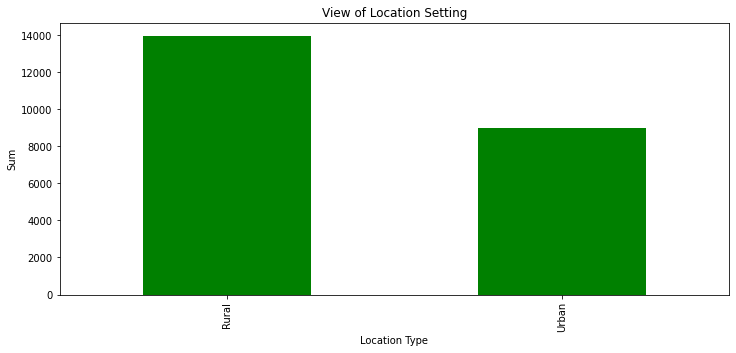

In [272]:
# Location setting
df_cleaned1['location_setting'].value_counts().plot(kind='bar', color='green', figsize=(12,5))
plt.xlabel('Location Type')
plt.ylabel('Sum')
plt.title('View of Location Setting')
plt.show()

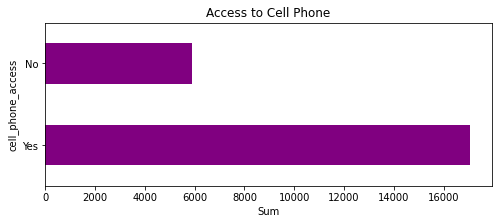

In [273]:
# Cell phone access	
df_cleaned1['cell_phone_access'].value_counts().plot(kind='barh', color='purple', figsize=(8,3))
plt.xlabel('Sum')
plt.ylabel('cell_phone_access')
plt.title('Access to Cell Phone')
plt.show()

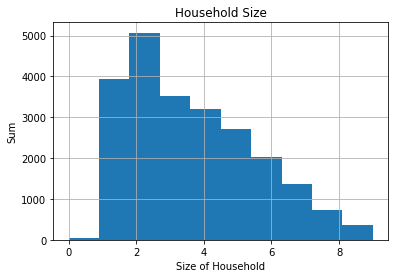

In [274]:
# Household Size
df_cleaned1['household_size'].hist(bins=10)
plt.xlabel('Size of Household')
plt.ylabel('Sum')
plt.title('Household Size')
plt.show()

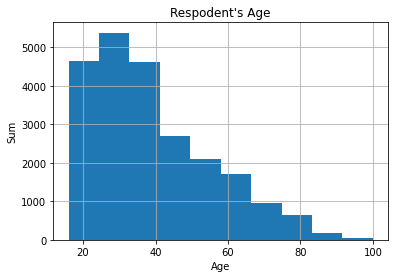

In [275]:
# Age of Respodent 
df_cleaned1['respodent_age'].hist(bins=10)
plt.xlabel("Age")
plt.ylabel("Sum")
plt.title("Respodent's Age")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


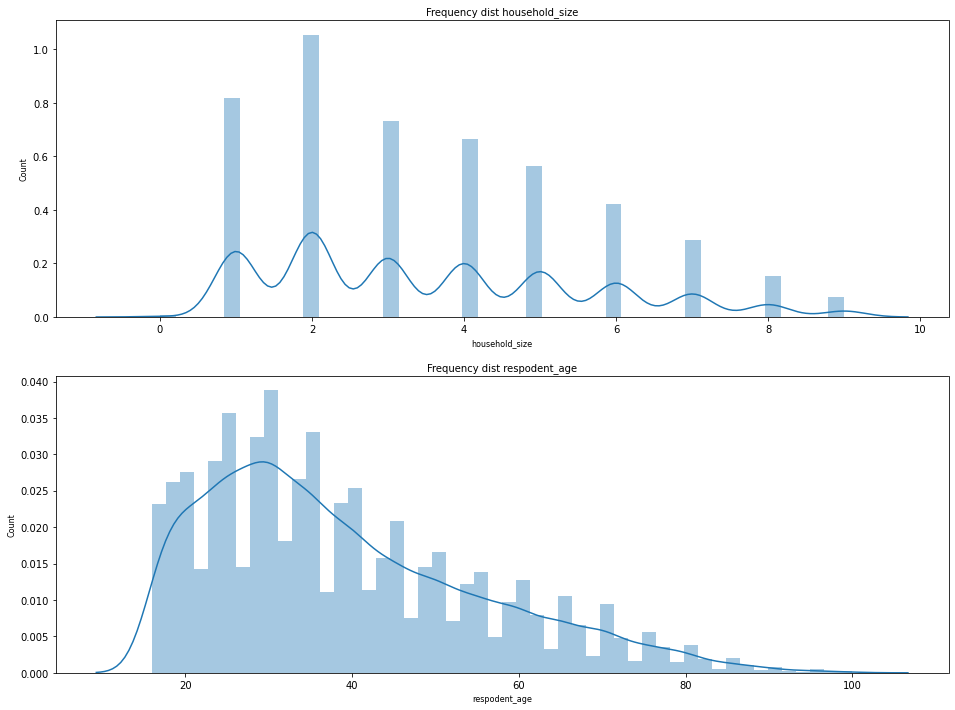

In [276]:
col_names = ['household_size','respodent_age']

fig, ax = plt.subplots(len(col_names), figsize=(16,12))

for i, col_val in enumerate(col_names):

    sns.distplot(df_cleaned1[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Frequency dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

# Bivariate Analysis

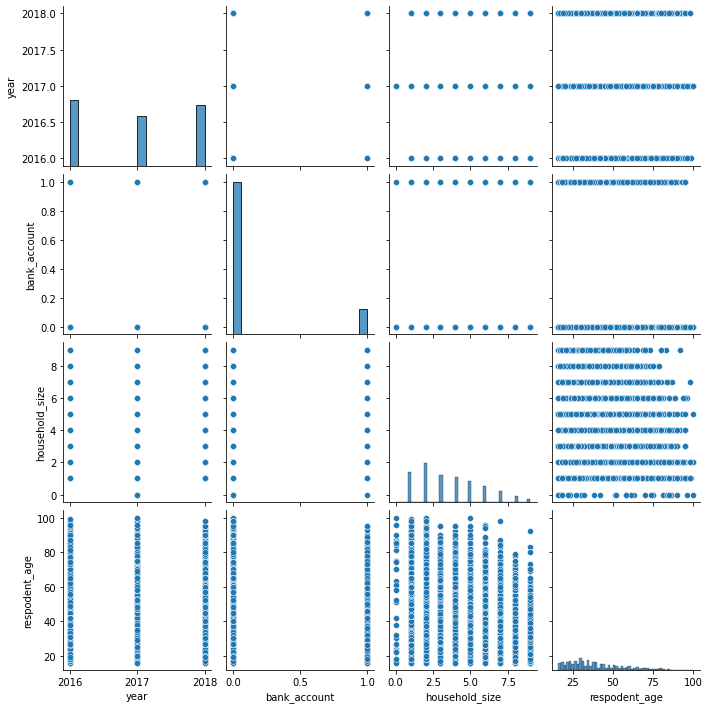

In [277]:
# Bivariate visualization of numerical variables
sns.pairplot(df_cleaned1)


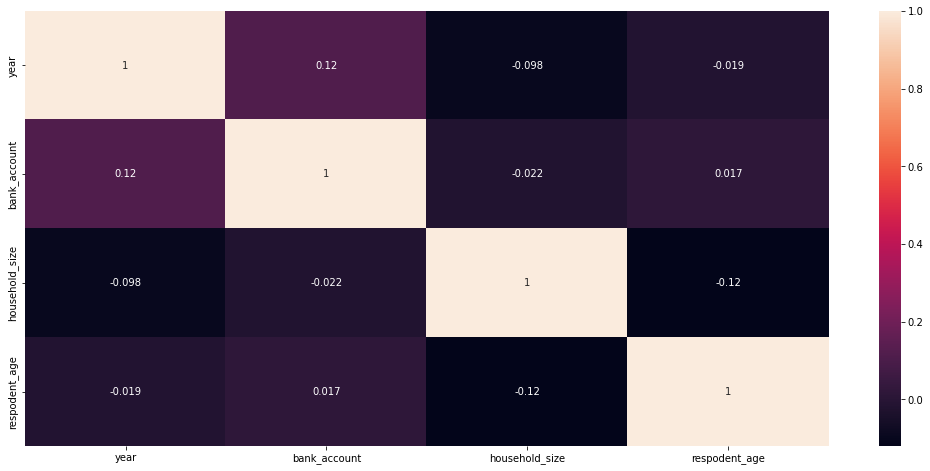

In [278]:
# Visualizing correlation between variables as defined by pearson coefficient
plt.figure(figsize=(18, 8))

vg_corr = df_cleaned1.corr()
sns.heatmap(vg_corr, 
            xticklabels = vg_corr.columns.values,
            yticklabels = vg_corr.columns.values,
            annot = True);

In [279]:
# Calculating the pearson coefficient to confirm the visualized correlation

pearson_coeff = df_cleaned1['household_size'].corr(df_cleaned1['respodent_age'], method='pearson') 
print(pearson_coeff)

# Checking whether we have to define the pearson
coeff = df_cleaned1['household_size'].corr(df_cleaned1['respodent_age']) 
print(coeff)

# The visualized pearson coefficient/correlation between household size and age of respondents is same as the computed one above. 
# From the calculation, a pearson coefficient of -0.12 implies that there is a weak correlation between household size and age of respondents. 

-0.11945485062769651
-0.11945485062769651


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

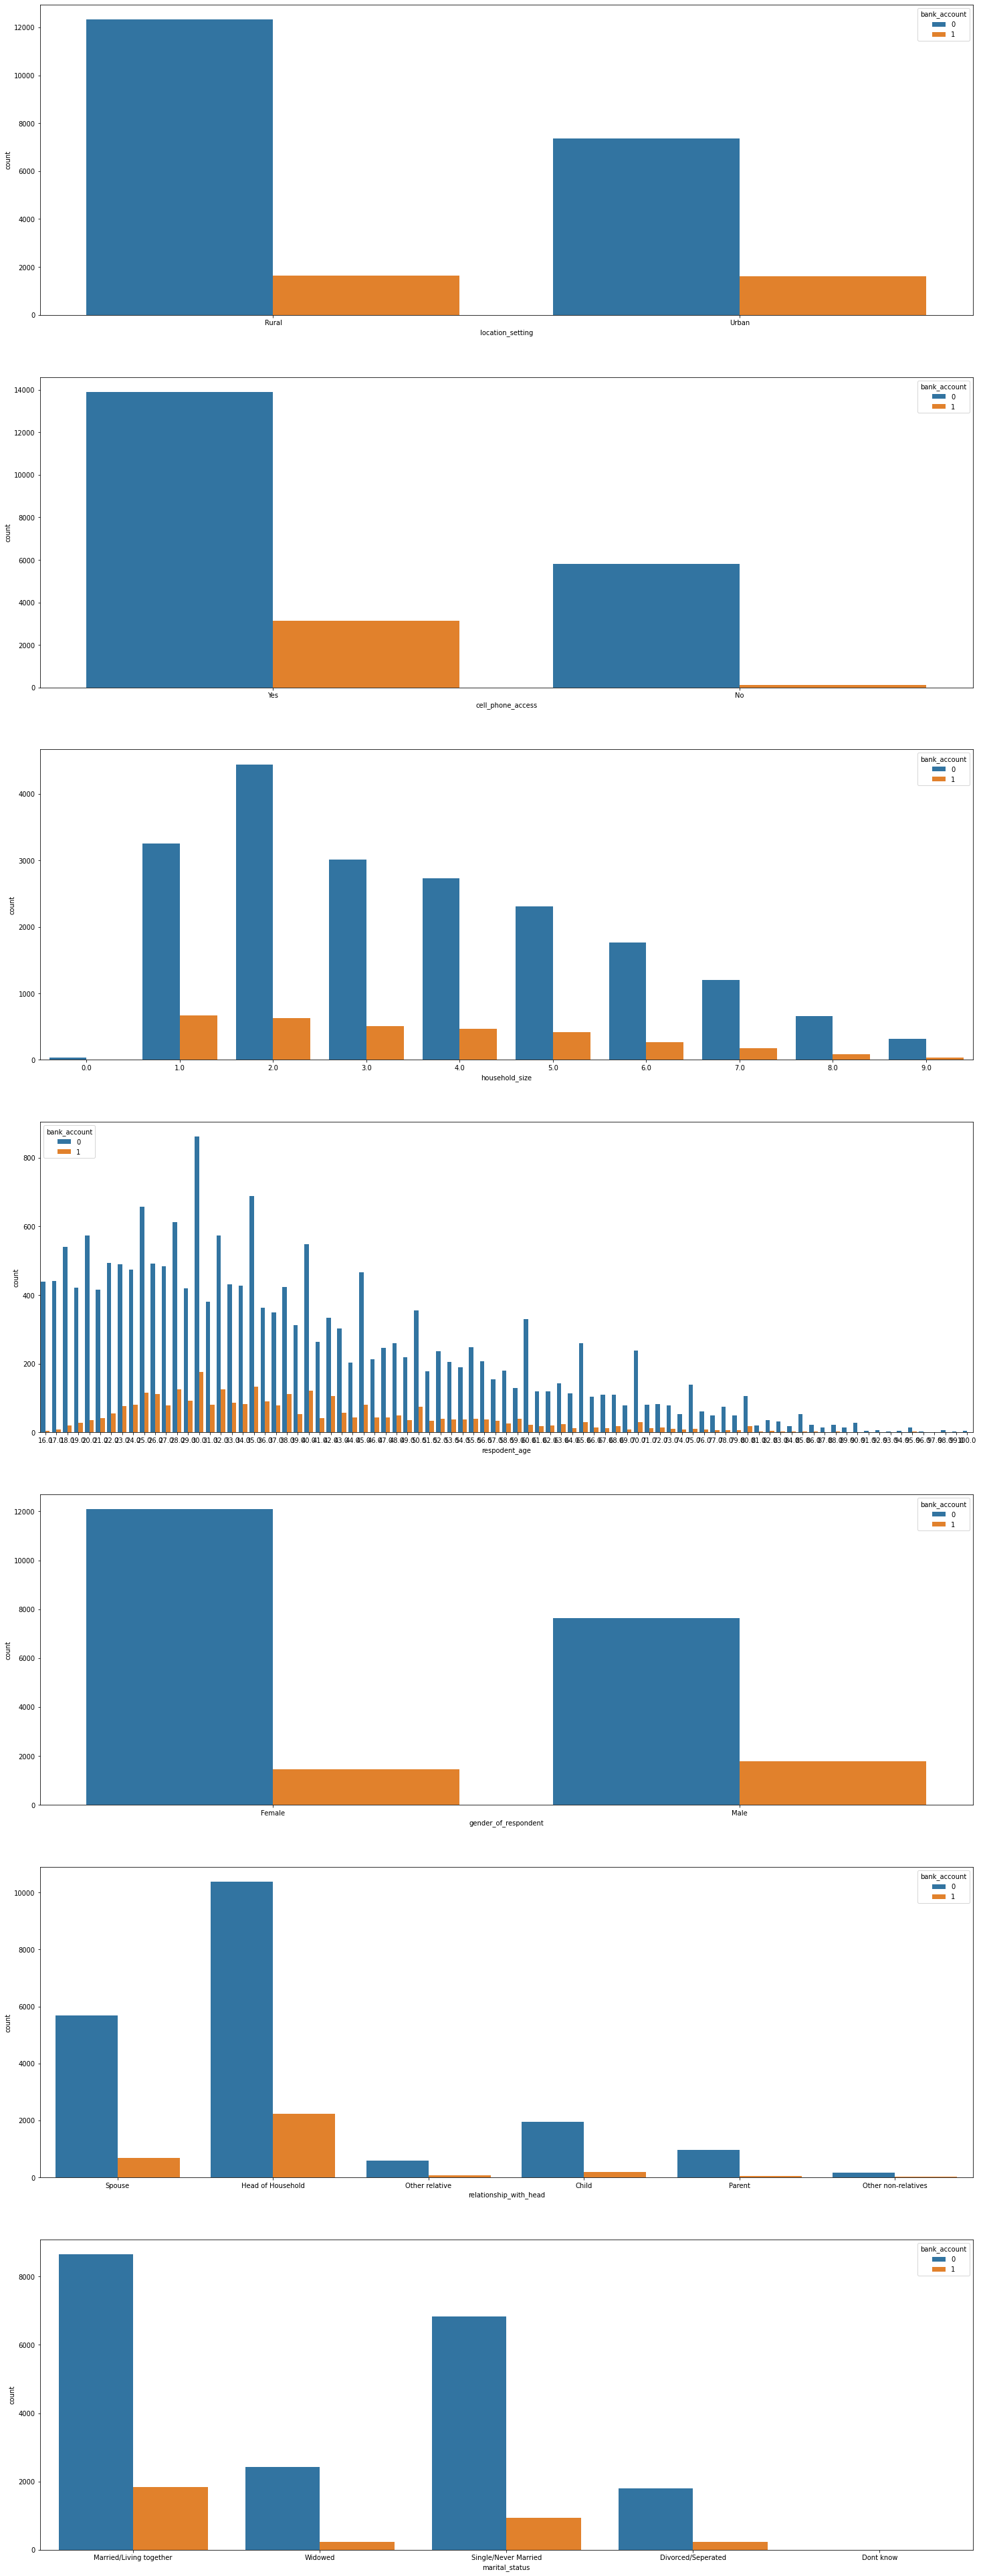

In [280]:
# Visualizing variables' relationship with bank account ownership

f, axes = plt.subplots(7, 1, figsize=[25,70])

sns.countplot('location_setting', hue= 'bank_account', data=df_cleaned1, ax=axes[0])
sns.countplot('cell_phone_access', hue= 'bank_account', data=df_cleaned1, ax=axes[1])
sns.countplot('household_size', hue= 'bank_account', data=df_cleaned1, ax=axes[2])
sns.countplot('respodent_age', hue= 'bank_account', data=df_cleaned1, ax=axes[3])
sns.countplot('gender_of_respondent', hue= 'bank_account', data=df_cleaned1, ax=axes[4])
sns.countplot('relationship_with_head', hue= 'bank_account', data=df_cleaned1, ax=axes[5])
sns.countplot('marital_status', hue= 'bank_account', data=df_cleaned1, ax=axes[6])

Text(0.5, 1.0, 'Country vs Bank Account ownership')

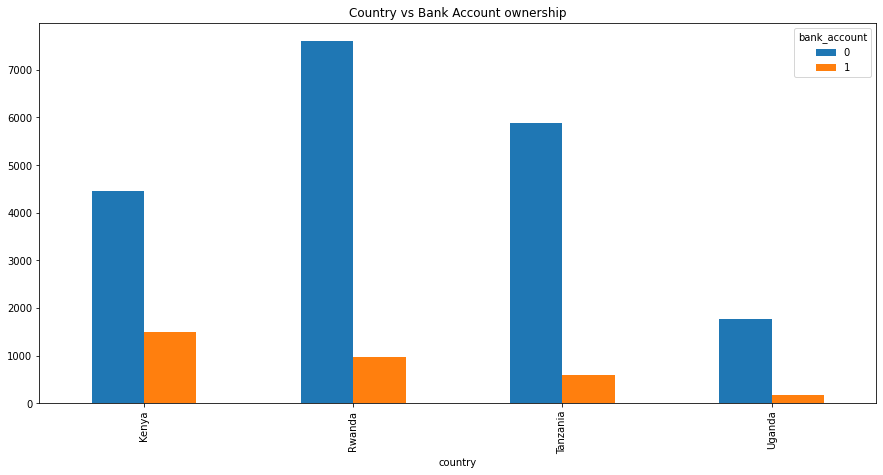

In [281]:
# Visualizing the relationship between respondent's education level and bank account ownership

pd.crosstab(df_cleaned1['country'],df_cleaned1['bank_account']).plot(kind='bar',figsize=(15,7))
plt.title('Country vs Bank Account ownership')

Text(0.5, 1.0, 'Education Level vs Bank Account ownership')

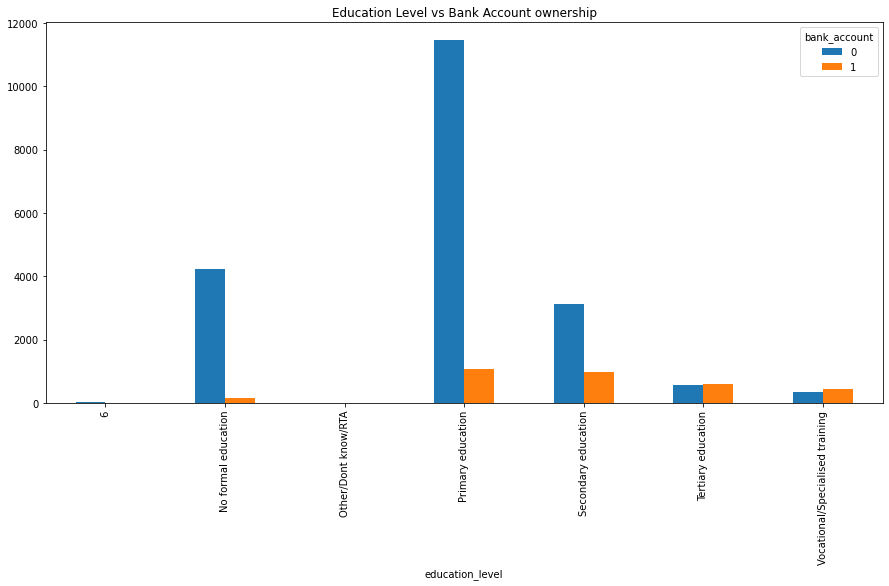

In [282]:
# Visualizing the relationship between respondent's level of education and bank account ownership

pd.crosstab(df_cleaned1['education_level'],df_cleaned1['bank_account']).plot(kind='bar',figsize=(15,7))
plt.title('Education Level vs Bank Account ownership')

Text(0.5, 1.0, 'Job Type vs Bank Account ownership')

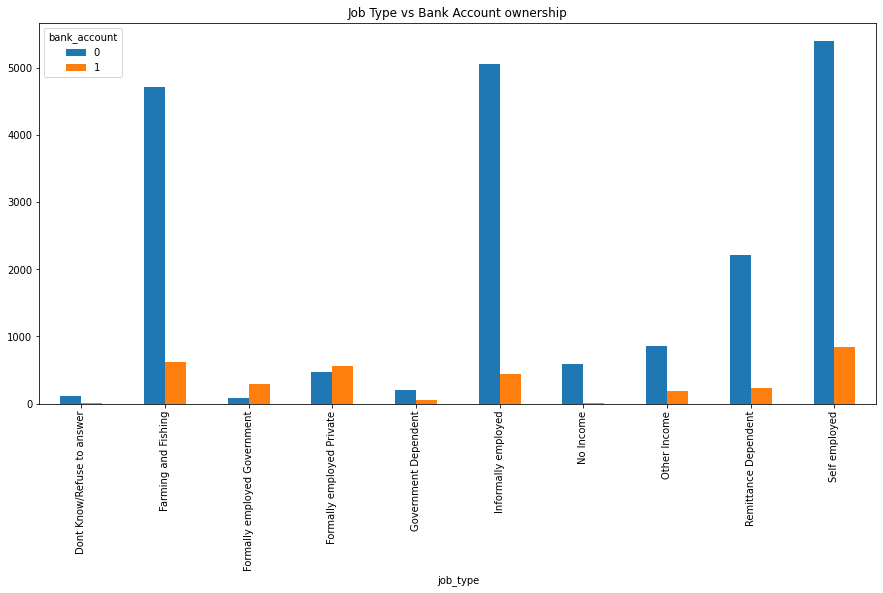

In [283]:
# Visualizing the relationship between respondent's job type and bank account ownership

pd.crosstab(df_cleaned1['job_type'],df_cleaned1['bank_account']).plot(kind='bar',figsize=(15,7))
plt.title('Job Type vs Bank Account ownership')

# Multivariate Analysis

## Principal Component Analysis

In [284]:
# Preprocessing
# The first preprocessing step is to divide the dataset into a feature set and corresponding labels. 
X = df_cleaned1.drop('year', 1)
y = df_cleaned1['year']


In [285]:
# Data Preproccessing 
# Splitting the dataset into the Training set and Test sets
# 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.head()

,country,bank_account,location_setting,cell_phone_access,household_size,respodent_age,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
999,Kenya,0,Urban,Yes,2.0,20.0,Female,Spouse,Married/Living together,Secondary education,Remittance Dependent
7780,Rwanda,0,Rural,Yes,7.0,38.0,Male,Head of Household,Married/Living together,Primary education,Farming and Fishing
14178,Rwanda,0,Urban,Yes,8.0,33.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
10554,Rwanda,0,Rural,Yes,6.0,21.0,Male,Parent,Married/Living together,Secondary education,Self employed
16187,Tanzania,0,Urban,Yes,3.0,18.0,Male,Parent,Divorced/Seperated,Primary education,Self employed


In [286]:
# Converting categorical features to numerical features using LabelEncoder
X_train['location_setting'] = ba.fit_transform(X_train['location_setting'])
X_train['cell_phone_access'] = ba.fit_transform(X_train['cell_phone_access'])
X_train['gender_of_respondent'] = ba.fit_transform(X_train['gender_of_respondent'])


X_test['location_setting'] = ba.fit_transform(X_test['location_setting'])
X_test['cell_phone_access'] = ba.fit_transform(X_test['cell_phone_access'])
X_test['gender_of_respondent'] = ba.fit_transform(X_test['gender_of_respondent'])

X_train.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,country,bank_account,location_setting,cell_phone_access,household_size,respodent_age,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
999,Kenya,0,1,1,2.0,20.0,0,Spouse,Married/Living together,Secondary education,Remittance Dependent
7780,Rwanda,0,0,1,7.0,38.0,1,Head of Household,Married/Living together,Primary education,Farming and Fishing
14178,Rwanda,0,1,1,8.0,33.0,0,Head of Household,Single/Never Married,Secondary education,Other Income
10554,Rwanda,0,0,1,6.0,21.0,1,Parent,Married/Living together,Secondary education,Self employed
16187,Tanzania,0,1,1,3.0,18.0,1,Parent,Divorced/Seperated,Primary education,Self employed


In [287]:
# Converting categorical features by One Hot Encoding
X_train['country_'] = X_train['country']
X_test['country_'] = X_test['country']

categ = ['relationship_with_head','education_level', 'marital_status', 'job_type', 'country', 'country_']
# One Hot Encoding conversion
X_train = pd.get_dummies(X_train, prefix_sep='_', columns = categ)

X_test = pd.get_dummies(X_test, prefix_sep='_', columns = categ)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [288]:
X_train.head()

,bank_account,location_setting,cell_phone_access,household_size,respodent_age,gender_of_respondent,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,education_level_6,education_level_No formal education,education_level_Other/Dont know/RTA,education_level_Primary education,education_level_Secondary education,education_level_Tertiary education,education_level_Vocational/Specialised training,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,country__Kenya,country__Rwanda,country__Tanzania,country__Uganda
999,0,1,1,2.0,20.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
7780,0,0,1,7.0,38.0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
14178,0,1,1,8.0,33.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
10554,0,0,1,6.0,21.0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
16187,0,1,1,3.0,18.0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0


In [289]:
X_train1=X_train.drop(['education_level_Other/Dont know/RTA'], axis=1)


In [290]:
X_train1.shape

(18371, 41)

In [291]:
X_test.shape

(4593, 41)

In [292]:
X_test.duplicated().sum()

285

In [293]:
X_test.drop_duplicates()


,bank_account,location_setting,cell_phone_access,household_size,respodent_age,gender_of_respondent,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,education_level_6,education_level_No formal education,education_level_Primary education,education_level_Secondary education,education_level_Tertiary education,education_level_Vocational/Specialised training,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,country__Kenya,country__Rwanda,country__Tanzania,country__Uganda
5497,1,0,1,3.0,47.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
23278,1,0,1,4.0,37.0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
20485,0,1,1,2.0,64.0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
8665,0,0,1,4.0,53.0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
9794,1,0,1,4.0,36.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17940,0,0,1,3.0,30.0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
861,0,0,1,1.0,31.0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
19710,0,1,0,0.0,58.0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
13757,1,0,1,3.0,30.0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0


In [294]:
X_train1.duplicated().sum()

3064

In [295]:
X_train1.drop_duplicates()

,bank_account,location_setting,cell_phone_access,household_size,respodent_age,gender_of_respondent,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,education_level_6,education_level_No formal education,education_level_Primary education,education_level_Secondary education,education_level_Tertiary education,education_level_Vocational/Specialised training,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,country__Kenya,country__Rwanda,country__Tanzania,country__Uganda
999,0,1,1,2.0,20.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
7780,0,0,1,7.0,38.0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
14178,0,1,1,8.0,33.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
10554,0,0,1,6.0,21.0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
16187,0,1,1,3.0,18.0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9383,0,0,0,6.0,45.0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
21652,0,1,0,1.0,28.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
13333,0,0,1,4.0,48.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
10012,0,0,0,8.0,20.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0


In [296]:
# Normalization
# We will perform standard scalar normalization to normalize our feature set. 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train1 = sc.fit_transform(X_train1)
X_test = sc.transform(X_test)

In [297]:
# Applying PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train1 = pca.fit_transform(X_train1)
X_test = pca.transform(X_test)

In [298]:
 # Explained Variance Ratio
 explained_variance = pca.explained_variance_ratio_
 explained_variance

array([1.16418707e-01, 7.91760145e-02, 6.94600807e-02, 6.54979452e-02,
       5.14597242e-02, 4.82178550e-02, 4.15456200e-02, 3.65306014e-02,
       3.18806779e-02, 3.05909979e-02, 2.66501805e-02, 2.53486426e-02,
       2.50188647e-02, 2.48315522e-02, 2.46882055e-02, 2.44381297e-02,
       2.43007327e-02, 2.38469746e-02, 2.37147315e-02, 2.31069482e-02,
       2.26157224e-02, 2.12927174e-02, 1.93449601e-02, 1.86080771e-02,
       1.67956625e-02, 1.53193866e-02, 1.41442360e-02, 1.38693685e-02,
       1.24339104e-02, 1.06003838e-02, 1.04443384e-02, 7.79341470e-03,
       1.46364542e-05, 8.00413499e-31, 2.29595416e-32, 1.40721923e-32,
       8.90927847e-33, 1.53983888e-33, 1.07449801e-33, 7.64129573e-34,
       4.66548136e-34])

In [299]:
# Using 1 Principal Component
# We use 1 principal component to train our algorithm. 
# 
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train1 = pca.fit_transform(X_train1)
X_test = pca.transform(X_test)

In [300]:
# Training and Making Predictions
# We use random forest classification for making the predictions.
# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=42)
classifier.fit(X_train1, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [301]:
# Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

# Noting that from the output that with only one feature, 
# the random forest algorithm is able to correctly predict 3,984 out of 4,593 instances, 
# resulting in 86.74% accuracy.

[[1508    0  223]
 [   0 1255   20]
 [ 357    9 1221]]
Accuracy 0.8674069235793599


## Factor Analysis

In [302]:
df_cleaned.columns
#col = pd.DataFrame([data], columns=['runs','balls', 'wickets', 'ground_average', 'pp_balls_left', 'total_overs'])

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_setting',
       'cell_phone_access', 'household_size', 'respodent_age',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [303]:
df_cleaned.isnull().sum()
#df.dropna(inplace=True)

country                   0
year                      0
uniqueid                  0
bank_account              0
location_setting          0
cell_phone_access         0
household_size            0
respodent_age             0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [304]:
df_cleaned.duplicated().sum()

0

In [305]:
df1 = df_cleaned.drop_duplicates()

In [306]:
# Removing Outliers identified above
df2 =df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
df2.head()

,country,year,uniqueid,bank_account,location_setting,cell_phone_access,household_size,respodent_age,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [307]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22964 entries, 0 to 23522
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 22964 non-null  object 
 1   year                    22964 non-null  int64  
 2   uniqueid                22964 non-null  object 
 3   bank_account            22964 non-null  object 
 4   location_setting        22964 non-null  object 
 5   cell_phone_access       22964 non-null  object 
 6   household_size          22964 non-null  float64
 7   respodent_age           22964 non-null  float64
 8   gender_of_respondent    22964 non-null  object 
 9   relationship_with_head  22964 non-null  object 
 10  marital_status          22964 non-null  object 
 11  education_level         22964 non-null  object 
 12  job_type                22964 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.5+ MB


In [308]:
# Adequacy Test
# Installing factor analyzer 
!pip install factor_analyzer==0.2.3

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(df2)
chi_square_value, p_value

# In Bartlett ’s test, the p-value is 5.416892829747934e-33 (~0.0 when rounded to 2 decimal points). The test was statistically significant, 
# indicating that the observed correlation matrix is not identity matrix.

(570.9202177504457, 2.076948252853231e-76)

In [ ]:
# Kaiser-Meyer-Olkin (KMO) Test to measure the suitability of data for factor analysis. 
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(df2)


In [312]:
from factor_analyzer.factor_analyzer import FactorAnalyzer

# Creating factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.analyze(df2, 3, rotation=None)

# Checking the Eigenvalues
ev, v = fa.get_eigenvalues()
ev

#
# 2-factors eigenvalues are greater than one. 
# It means we need to choose only 2 factors

,Original_Eigenvalues
0,1.145423
1,1.018212
2,0.836364
